# WeatherPy

## Analysis: 
-  Max temp is highest the closer the city is to the equator. Temperatures are also lower the further north the city is from the equator than cities equidistant south of the equator
-  Humidity > 50% is prevalent for cities between latitues -50 to 75.
-  Higher wind speeds are found north of the equator.
    

In [1]:
# Import Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import openweathermapy.core as owm
import random
import numpy as np
import seaborn as sns
import urllib
from urllib.error import HTTPError
from citipy import citipy
from config import api_key
from random import uniform
from datetime import datetime

# Query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid=api_key&units=&q="

# Create output csv file
output_csv = "city_weather.csv"
    

## Generate Cities List

In [2]:
# Create lists for latitude and longitude

lat = []
lon = []

# Use random.uniform to generate random latitude and longitude values
for x in range(2000):
    lat.append(random.uniform(-90,90))
    lon.append(random.uniform(-180,180))
    
# Use citipy to define city and country from coordinates
# Create a new df

cities_df = pd.DataFrame({"Latitude": lat, "Longitude": lon, "City":""})

for index,row in cities_df.iterrows():
    city = citipy.nearest_city(row['Latitude'], row['Longitude'])
    cities_df.at[index,"City"] = (f"{city.city_name},{city.country_code}")
    
    
# Drop duplicates if any
cities_df = cities_df.drop_duplicates(["City"], keep='first')
cities_df = cities_df.reset_index(drop=True)


## Perform API Calls

In [3]:
# Create settings parameters
settings = {"units": "imperial", "appid": api_key}

# Run API calls and collect data
params = ['name','clouds.all','sys.country','dt','main.humidity','main.temp','wind.speed']


for index,row in cities_df.iterrows():
    try:
        city = row['City']
        data = owm.get_current(city, **settings)
        results = data(*params)
        cities_df.at[index,'City'] = (results[0])
        cities_df.at[index,'Cloudiness'] = (int(results[1]))
        cities_df.at[index,'Country'] = (results[2])
        cities_df.at[index,'Date'] = (results[3])
        cities_df.at[index,'Humidity'] = (int(results[4]))
        #cities_df.at[index,'Lng'] = (results[5])
        cities_df.at[index,'Max Temp'] = (results[5])     
        cities_df.at[index,'Wind Speed'] = (results[6])
        print(f"Retrieving Results for Index {index}: {city}.")
        print(f"{url} + {query_url}")
    # Skip the city if an error is encountered
    except(HTTPError): 
        print(f"Processing Record {index}: {city}")
        print(f"Missing field/result for {row['City']}. Skipping.")
        pass
    
# Print notification when complete
print("----------------------------")
print("Data Retrieval Complete     ")

Retrieving Results for Index 0: kurchum,kz.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 1: albany,au.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 2: bilma,ne.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 3: quatre cocos,mu.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 4: carnarvon,au.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 5: rikitea,pf.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrie

Retrieving Results for Index 51: korla,cn.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Processing Record 52: taolanaro,mg
Missing field/result for taolanaro,mg. Skipping.
Retrieving Results for Index 53: yellowknife,ca.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 54: shingu,jp.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 55: gejiu,cn.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 56: dubbo,au.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 57: butaritari,ki.
http://api.openweathermap.org/data/2.5/we

Retrieving Results for Index 105: puurmani,ee.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 106: barrow,us.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 107: jiexiu,cn.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 108: dunajska streda,sk.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 109: nanortalik,gl.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 110: santo domingo,ni.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=

Retrieving Results for Index 156: novyy urengoy,ru.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Processing Record 157: codrington,ag
Missing field/result for codrington,ag. Skipping.
Processing Record 158: burica,pa
Missing field/result for burica,pa. Skipping.
Retrieving Results for Index 159: lubuagan,ph.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 160: aklavik,ca.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Processing Record 161: kuche,cn
Missing field/result for kuche,cn. Skipping.
Processing Record 162: tubruq,ly
Missing field/result for tubruq,ly. Skipping.
Retrieving Results for Index 163: coquimbo,cl.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Re

Retrieving Results for Index 209: sobolevo,ru.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 210: tetouan,ma.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Processing Record 211: shirgaon,in
Missing field/result for shirgaon,in. Skipping.
Retrieving Results for Index 212: rancho palos verdes,us.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 213: klaksvik,fo.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 214: le vauclin,mq.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 215: bambous virieux,mu.
http://api.

Retrieving Results for Index 262: makushino,ru.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 263: cayenne,gf.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 264: peniche,pt.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 265: ambulu,id.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 266: antalaha,mg.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 267: grindavik,is.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&unit

Retrieving Results for Index 315: castro,cl.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 316: bougouni,ml.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 317: ilo,pe.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 318: constitucion,mx.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 319: boa vista,br.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 320: saint-leu,re.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&uni

Retrieving Results for Index 367: ndele,cf.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Processing Record 368: thano bula khan,pk
Missing field/result for thano bula khan,pk. Skipping.
Retrieving Results for Index 369: lumberton,us.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 370: keti bandar,pk.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 371: westport,ie.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 372: saint-joseph,re.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 373: longyearbyen,sj.
http://

Retrieving Results for Index 421: panguna,pg.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Processing Record 422: odweyne,so
Missing field/result for odweyne,so. Skipping.
Retrieving Results for Index 423: nahariyya,il.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 424: teeli,ru.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 425: salalah,om.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 426: muravlenko,ru.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 427: raudeberg,no.
http://api.openweathermap.org/dat

Retrieving Results for Index 475: kupino,ru.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Processing Record 476: saint-georges,gf
Missing field/result for saint-georges,gf. Skipping.
Retrieving Results for Index 477: vestmannaeyjar,is.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 478: magistralnyy,ru.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 479: leeton,au.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 480: seddon,nz.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 481: svetlogorsk,ru.
http://api.op

Retrieving Results for Index 528: kambove,cd.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 529: okhotsk,ru.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Processing Record 530: one hundred mile house,ca
Missing field/result for one hundred mile house,ca. Skipping.
Retrieving Results for Index 531: narasannapeta,in.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Processing Record 532: kapoeta,sd
Missing field/result for kapoeta,sd. Skipping.
Retrieving Results for Index 533: inirida,co.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Processing Record 534: saint-pascal,ca
Missing field/result for saint-pascal,ca. Skipping.
Processing Record 535: sahrak,af
Missing fi

Retrieving Results for Index 582: zonguldak,tr.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Processing Record 583: tuggurt,dz
Missing field/result for tuggurt,dz. Skipping.
Retrieving Results for Index 584: mozarlandia,br.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 585: matay,eg.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 586: garowe,so.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 587: charters towers,au.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 588: xinzhou,cn.
http://api.openweathermap.o

Retrieving Results for Index 634: tanabe,jp.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 635: jimo,cn.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 636: pau brasil,br.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 637: dengzhou,cn.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 638: ziway,et.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Processing Record 639: sinkat,sd
Missing field/result for sinkat,sd. Skipping.
Retrieving Results for Index 640: jiuquan,cn.
http://api.openweathermap.org/data/2.5/wea

Retrieving Results for Index 690: lokosovo,ru.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 691: kyabe,td.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 692: punta alta,ar.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 693: buzmeyin,tm.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 694: lyubech,ua.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 695: lumphat,kh.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units

Retrieving Results for Index 742: nelson,ca.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 743: santa rosalia,mx.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 744: jaru,br.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 745: tazovskiy,ru.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 746: takoradi,gh.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 747: cockburn town,bs.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_k

In [4]:
# Drop the nulls and count the number of cities with data retrieved
cities_df = cities_df.dropna(how='any')
cities_df.count()

City          670
Latitude      670
Longitude     670
Cloudiness    670
Country       670
Date          670
Humidity      670
Max Temp      670
Wind Speed    670
dtype: int64

In [5]:
# Display the city dataframe
cities_df.head()

,City,Latitude,Longitude,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed
0,Kurchum,48.609231,82.357251,32.0,KZ,1.522684e+09,83.0,26.99,2.59
1,Albany,-62.023661,117.327091,0.0,AU,1.522684e+09,80.0,61.82,11.32
2,Bilma,19.378641,12.774386,0.0,NE,1.522684e+09,17.0,93.95,9.75
3,Quatre Cocos,-17.565876,63.461857,75.0,MU,1.522681e+09,78.0,82.40,4.70
4,Carnarvon,-23.416985,103.093519,32.0,AU,1.522684e+09,94.0,80.36,6.62


In [6]:
# Output results to csv file
cities_df.to_csv(output_csv)

## Latitude vs Temperature Plot

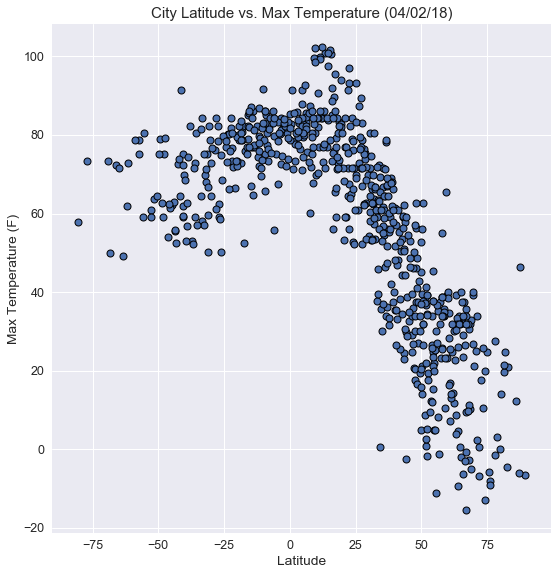

In [20]:
#Get today's date
date = datetime.now()
today = date.strftime("%m/%d/%y")

# Build a scatter plot to show the relationship between Temperature (F) vs Latitude
sns.set_style('darkgrid')
sns.set(font_scale=1.25)
sns.lmplot(x='Latitude', y='Max Temp', data=cities_df, fit_reg=False, size = 8, scatter_kws={'alpha':1, 'linewidths':1, 'edgecolor':'k'})

plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.ylabel("Max Temperature (F)")
# Save as png file
plt.savefig("lat_temp.png")
# Show plot
plt.show()

## Latitude vs. Humidity Plot

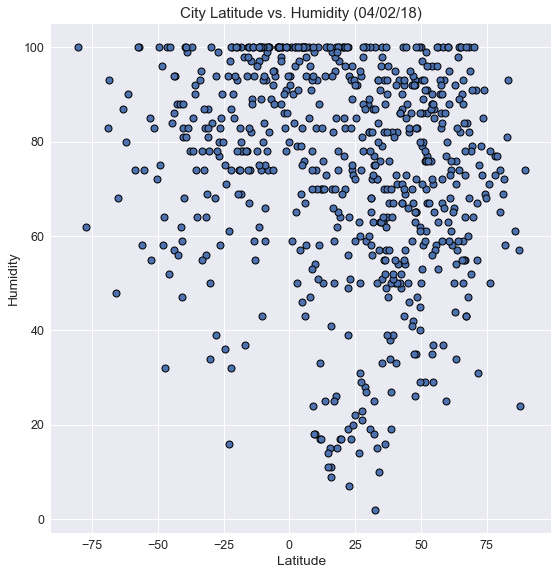

In [21]:
# Build a scatter plot to show the relationship between Humidity vs Latitude
sns.set_style('darkgrid')
sns.set(font_scale=1.25)
sns.lmplot(x='Latitude', y='Humidity', data=cities_df, fit_reg=False, size = 8, scatter_kws={'alpha':1, 'linewidths':1, 'edgecolor':'k'})

plt.title(f"City Latitude vs. Humidity ({today})")

# Save as png file
plt.savefig("lat_humidity.png")
# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

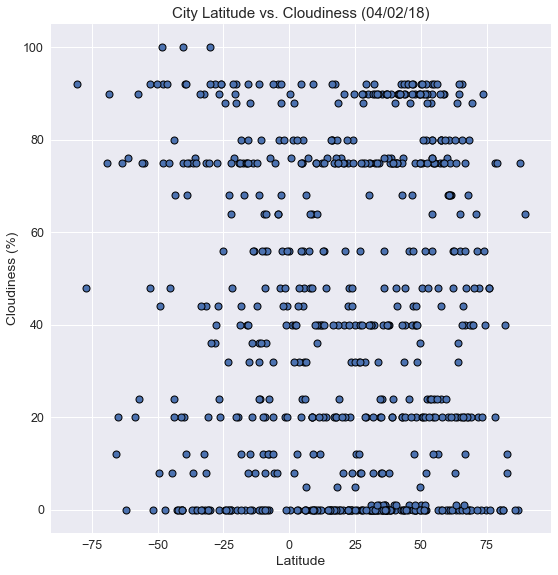

In [22]:
# Build a scatter plot to show the relationship between Cloudiness vs Latitude
sns.set_style('darkgrid')
sns.set(font_scale=1.25)
sns.lmplot(x='Latitude', y='Cloudiness', data=cities_df, fit_reg=False, size = 8, scatter_kws={'alpha':1, 'linewidths':1, 'edgecolor':'k'})

plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.ylabel("Cloudiness (%)")

# Save as png file
plt.savefig("lat_cloudiness.png")
# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

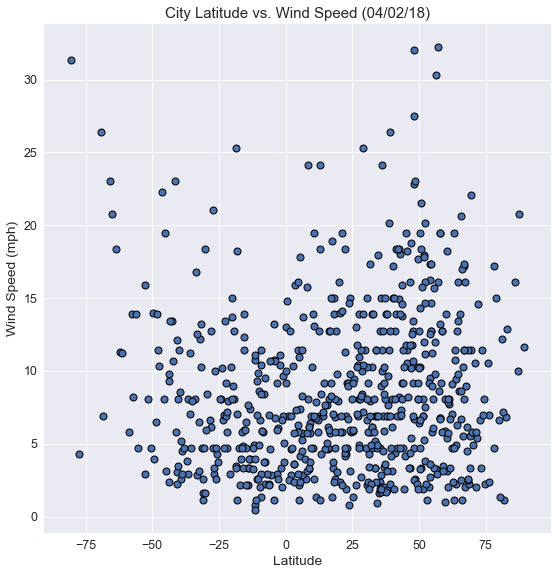

In [23]:
# Build a scatter plot to show the relationship between Wind Speed vs Latitude
sns.set_style('darkgrid')
sns.set(font_scale=1.25)
sns.lmplot(x='Latitude', y='Wind Speed', data=cities_df, fit_reg=False, size = 8, scatter_kws={'alpha':1, 'linewidths':1, 'edgecolor':'k'})

plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.ylabel("Wind Speed (mph)")

# Save as png file
plt.savefig("lat_wind.png")
# Show plot
plt.show()